In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [44]:
steam_games = pd.read_parquet('steam_games.parquet')

In [45]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30083 entries, 0 to 32133
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        30083 non-null  object        
 1   app_name      30083 non-null  object        
 2   title         30083 non-null  object        
 3   release_date  29780 non-null  datetime64[ns]
 4   tags          30083 non-null  object        
 5   specs         30083 non-null  object        
 6   price         28815 non-null  float64       
 7   id            30083 non-null  object        
 8   developer     28834 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 2.3+ MB


Top 20 desarrolladoras con más juegos lanzados 

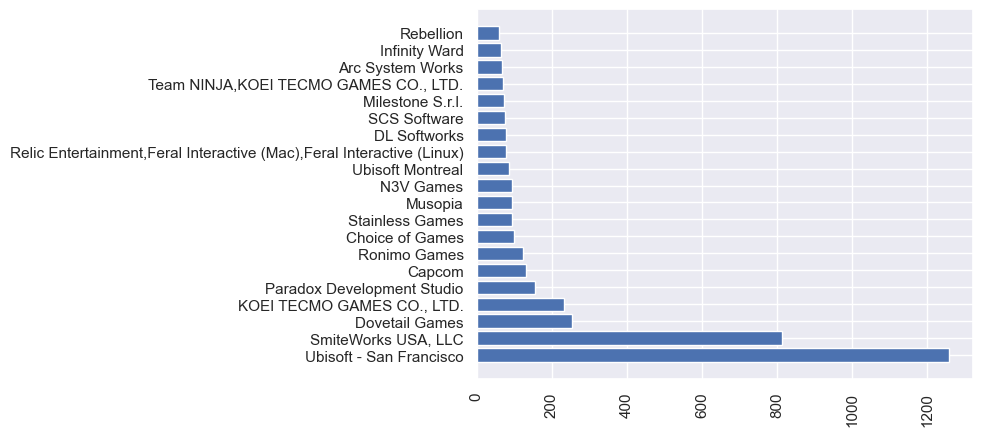

In [46]:
devs_count = steam_games['developer'].value_counts().nlargest(20)

plt.barh(devs_count.index, width=devs_count.values)
plt.xticks(rotation=90)
plt.show()

Gráfico de dispersión respecto al precio de los videojuegos

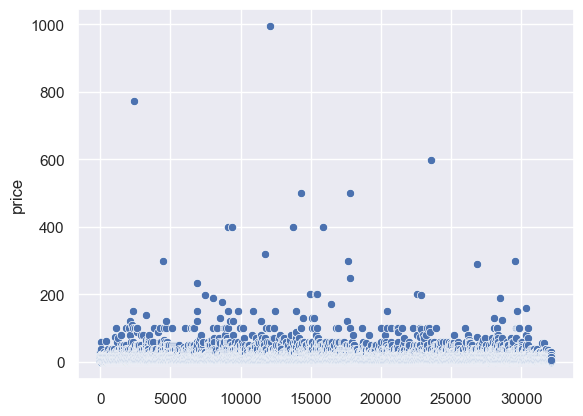

In [47]:
sns.scatterplot(steam_games.price)
plt.show()

In [48]:
Q1 = steam_games['price'].quantile(0.25)
Q3 = steam_games['price'].quantile(0.75)
IQR = Q3 - Q1

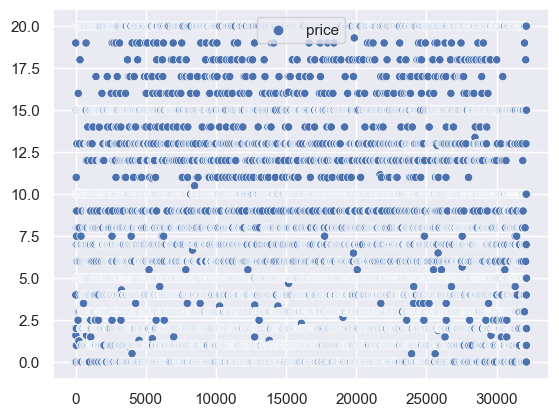

In [49]:
sns.scatterplot(steam_games[(steam_games['price'] >= Q1-1.5*IQR) & (steam_games['price'] <= Q3+1.5*IQR)])
plt.show()

Promedio del precio de los videojuegos en función del tiempo

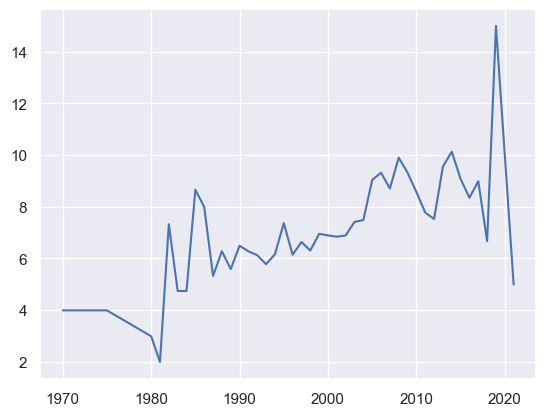

In [50]:
plt.plot(steam_games[['release_date','price']].groupby(steam_games.release_date.dt.year)['price'].mean())
plt.show()

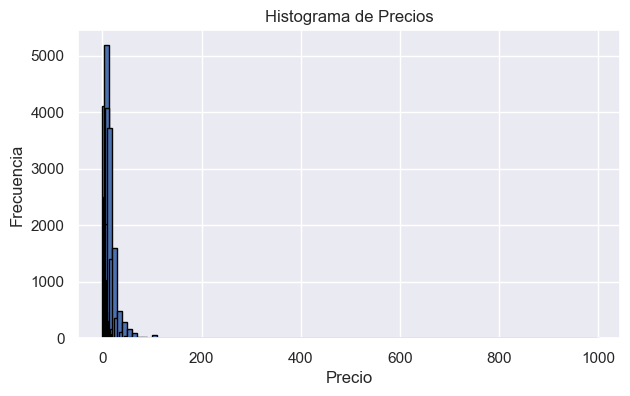

In [51]:
plt.figure(figsize=(7, 4))
plt.hist(steam_games['price'], bins=700, edgecolor='black', width=10)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

plt.show()

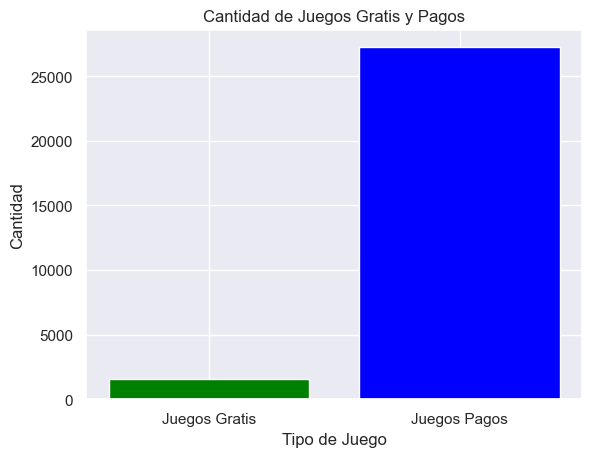

In [52]:
free_games = steam_games[steam_games['price'] == 0].shape[0]
paid_games = steam_games[steam_games['price'] > 0].shape[0]

plt.bar(['Juegos Gratis', 'Juegos Pagos'], [free_games, paid_games], color=['green', 'blue'])

plt.xlabel('Tipo de Juego')
plt.ylabel('Cantidad')
plt.title('Cantidad de Juegos Gratis y Pagos')

plt.show()

In [53]:
data_items = pd.read_parquet('data_items.parquet')

videojuegos más jugados

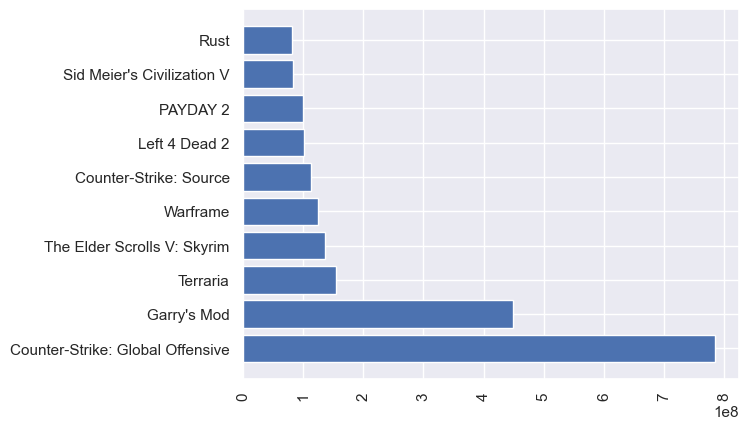

In [54]:
games_most_pld = data_items.groupby('item_name')['playtime_forever'].sum().nlargest(10)
plt.barh(games_most_pld.index, width=games_most_pld.values)
plt.xticks(rotation=90)
plt.show()

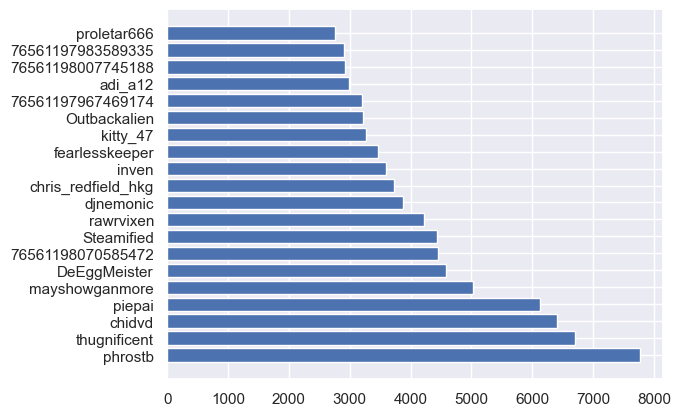

In [55]:
players_games = data_items.user_id.value_counts().nlargest(20)
plt.barh(players_games.index, width=players_games.values)
plt.show()

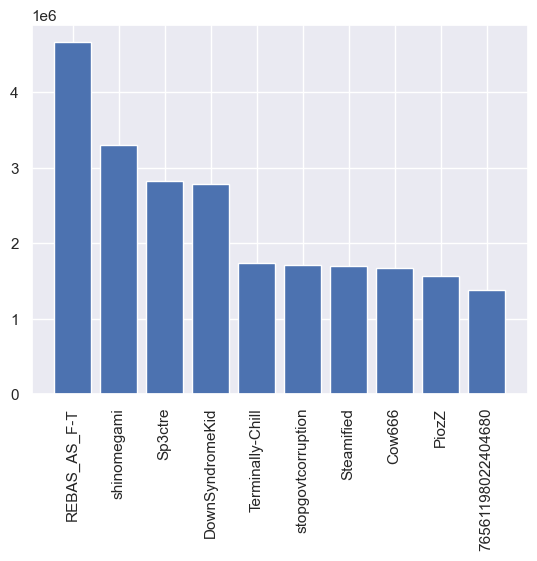

In [56]:
time_played = data_items.groupby('user_id')['playtime_forever'].sum().nlargest(10)
plt.bar(time_played.index, height=time_played.values)
plt.xticks(rotation=90)
plt.show()

Podemos apreciar que los jugadores que más juegan no precisamente son los que más compran videojuegos o viceversa

In [57]:
data_reviews = pd.read_parquet('data_reviews.parquet')

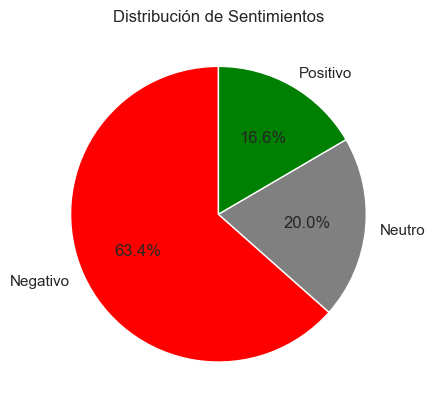

In [58]:
sentiment_counts = data_reviews['sentiment'].value_counts()

# Crear un diagrama circular
plt.pie(sentiment_counts, labels=['Negativo', 'Neutro', 'Positivo'], autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'green'])

# Añadir título
plt.title('Distribución de Sentimientos')

# Mostrar el diagrama circular
plt.show()

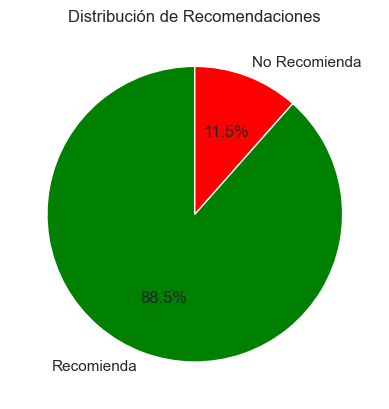

In [59]:
recommend_counts = data_reviews['recommend'].value_counts()

# Crear un diagrama circular
plt.pie(recommend_counts, labels=['Recomienda', 'No Recomienda'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

# Añadir título
plt.title('Distribución de Recomendaciones')

# Mostrar el diagrama circular
plt.show()

Usuario con comentarios más negativos


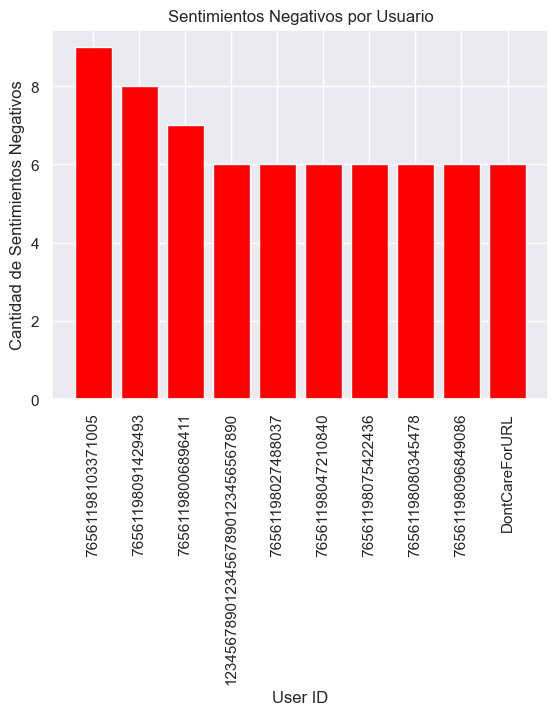

In [60]:
negative_sentiments = data_reviews[data_reviews['sentiment'] == 0]

# Contar la cantidad de sentimientos negativos por usuario
negative_sentiments_count = negative_sentiments.groupby('user_id')['sentiment'].count().nlargest(10)

# Crear un diagrama de barras
plt.bar(negative_sentiments_count.index, negative_sentiments_count.values, color='red')

# Añadir etiquetas y título
plt.xlabel('User ID')
plt.ylabel('Cantidad de Sentimientos Negativos')
plt.xticks(rotation=90)
plt.title('Sentimientos Negativos por Usuario')

# Mostrar el diagrama de barras
plt.show()

In [61]:
steam_games

,genres,app_name,title,release_date,tags,specs,price,id,developer
0,"[action, casual, indie, simulation, strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[strategy, action, indie, casual, simulation]",[single-player],4.99,761140,Kotoshiro
1,"[free to play, indie, rpg, strategy]",Ironbound,Ironbound,2018-01-04,"[free to play, strategy, indie, rpg, card game...","[single-player, multi-player, online multi-pla...",0.00,643980,Secret Level SRL
2,"[casual, free to play, indie, simulation, sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[free to play, simulation, sports, casual, ind...","[single-player, multi-player, online multi-pla...",0.00,670290,Poolians.com
3,"[action, adventure, casual]",弹炸人2222,弹炸人2222,2017-12-07,"[action, adventure, casual]",[single-player],0.99,767400,彼岸领域
5,"[action, adventure, simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[action, adventure, simulation, fps, shooter, ...","[single-player, steam achievements]",3.99,772540,Trickjump Games Ltd
...,...,...,...,...,...,...,...,...,...
32129,"[action, adventure, casual, indie]",Kebab it Up!,Kebab it Up!,2018-01-04,"[action, indie, casual, violent, adventure]","[single-player, steam achievements, steam cloud]",1.99,745400,Bidoniera Games
32130,"[casual, indie, simulation, strategy]",Colony On Mars,Colony On Mars,2018-01-04,"[strategy, indie, casual, simulation]","[single-player, steam achievements]",1.99,773640,"Nikita ""Ghost_RUS"""
32131,"[casual, indie, strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,2018-01-04,"[strategy, indie, casual]","[single-player, steam achievements, steam clou...",4.99,733530,Sacada
32132,"[indie, racing, simulation]",Russian Roads,Russian Roads,2018-01-04,"[indie, simulation, racing]","[single-player, steam achievements, steam trad...",1.99,610660,Laush Dmitriy Sergeevich
